In [38]:
# import thư viện
import pandas as pd
import numpy as np

In [39]:
# Đọc dữ liệu
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\decision_tree\\heart_disease\\heart\\heart.csv')
columns_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
dataset = pd.DataFrame(data=df, columns=columns_names)
dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [40]:
# Tạo dữ liệu để train model
y = df['target'].values
X = df.drop(columns=['target']).values

In [41]:
# Nomarlization 
df = df.apply(lambda x: (x - x.min())/(x.max() - x.min()))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[Text(0.5555555555555556, 0.875, 'cp <= 0.5\ngini = 0.5\nsamples = 717\nvalue = [356, 361]\nclass = Heart Disease'),
 Text(0.3333333333333333, 0.625, 'ca <= 0.5\ngini = 0.377\nsamples = 349\nvalue = [261, 88]\nclass = No Heart Disease'),
 Text(0.2222222222222222, 0.375, 'thal <= 2.5\ngini = 0.5\nsamples = 157\nvalue = [78, 79]\nclass = Heart Disease'),
 Text(0.1111111111111111, 0.125, 'gini = 0.383\nsamples = 93\nvalue = [24, 69]\nclass = Heart Disease'),
 Text(0.3333333333333333, 0.125, 'gini = 0.264\nsamples = 64\nvalue = [54, 10]\nclass = No Heart Disease'),
 Text(0.4444444444444444, 0.375, 'gini = 0.089\nsamples = 192\nvalue = [183, 9]\nclass = No Heart Disease'),
 Text(0.7777777777777778, 0.625, 'ca <= 0.5\ngini = 0.383\nsamples = 368\nvalue = [95, 273]\nclass = Heart Disease'),
 Text(0.6666666666666666, 0.375, 'gini = 0.26\nsamples = 247\nvalue = [38, 209]\nclass = Heart Disease'),
 Text(0.8888888888888888, 0.375, 'gini = 0.498\nsamples = 121\nvalue = [57, 64]\nclass = Heart Dise

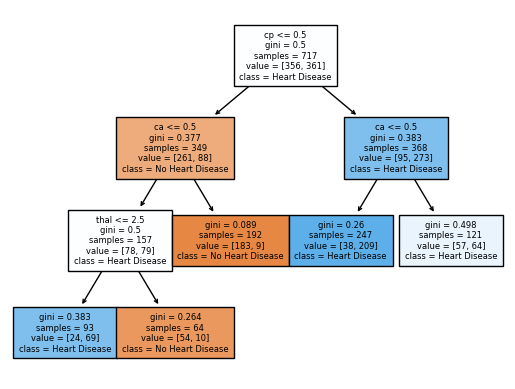

In [59]:
# Xây dựng cây
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import 

feature_names = columns_names
dtree = DecisionTreeClassifier(ccp_alpha=0.02, max_depth=4, criterion='gini')
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=feature_names, class_names={0:'No Heart Disease', 1:'Heart Disease'}, filled=True, fontsize=6)


In [44]:
dtree.get_params()

{'ccp_alpha': 0.02,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
# Dự đoán trên dữ liệu test 
from sklearn.metrics import classification_report

y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))  


              precision    recall  f1-score   support

           0       0.91      0.73      0.81       143
           1       0.80      0.93      0.86       165

    accuracy                           0.84       308
   macro avg       0.85      0.83      0.84       308
weighted avg       0.85      0.84      0.84       308



In [46]:
#show differences between tree that doesn't have stopping criteria and the one that does
dtree.predict_proba(X_test)

array([[0.25806452, 0.74193548],
       [0.47107438, 0.52892562],
       [0.953125  , 0.046875  ],
       [0.953125  , 0.046875  ],
       [0.84375   , 0.15625   ],
       [0.15384615, 0.84615385],
       [0.25806452, 0.74193548],
       [0.47107438, 0.52892562],
       [0.953125  , 0.046875  ],
       [0.84375   , 0.15625   ],
       [0.953125  , 0.046875  ],
       [0.47107438, 0.52892562],
       [0.953125  , 0.046875  ],
       [0.953125  , 0.046875  ],
       [0.25806452, 0.74193548],
       [0.15384615, 0.84615385],
       [0.953125  , 0.046875  ],
       [0.47107438, 0.52892562],
       [0.84375   , 0.15625   ],
       [0.953125  , 0.046875  ],
       [0.84375   , 0.15625   ],
       [0.25806452, 0.74193548],
       [0.47107438, 0.52892562],
       [0.15384615, 0.84615385],
       [0.15384615, 0.84615385],
       [0.84375   , 0.15625   ],
       [0.953125  , 0.046875  ],
       [0.15384615, 0.84615385],
       [0.953125  , 0.046875  ],
       [0.953125  , 0.046875  ],
       [0.

In [47]:
from sklearn import metrics
accuary = metrics.accuracy_score(y_test, y_pred)
print("y_test: ", y_test)
print("predictions: ", y_pred)
print("accuary: ", accuary)
f1_score = metrics.f1_score(y_test, y_pred)
print("f1_score: ", f1_score)


y_test:  [1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0]
predictions:  [1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[105,  38],
       [ 11, 154]], dtype=int64)

In [49]:
a = 126
print("actual value: ", y[a])
print("predicted value: ", y_pred[a])

actual value:  1
predicted value:  1
